In [92]:
import sys
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np
import glob, os

import itertools

from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage
from IPython.core.display import display, HTML

import statsmodels.api as sm

from pandas.tseries.offsets import *

from sklearn import linear_model, svm, cross_validation, naive_bayes, ensemble, tree, neighbors, decomposition, preprocessing

import seaborn as sns

import plotly.plotly as py  
import plotly.tools as tls   
import plotly.graph_objs as go

import pandas as pd
import numpy as np
import scipy
import pprint
%pylab inline
figsize(20,10)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy



In [93]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
pp = pprint.PrettyPrinter(indent=4)

exo_list = storage.exo_list()
pp.pprint(exo_list)


df = pd.DataFrame()

for e in exo_list:
    exo_series, exo_dict = storage.load_series(e)
    
    exo_series = exo_series[exo_series.columns[0]]
    df[exo_dict['name']] = exo_series
#exo_series.plot()

[   'ES_BullishCollarBW',
    'ES_BearishCollarBW',
    'ES_CallSpread',
    'ES_PutSpread',
    'ES_ContFut',
    'ZS_BullishCollarBW',
    'ZS_BearishCollarBW',
    'ZS_CallSpread',
    'ZS_PutSpread',
    'ZS_ContFut',
    'CL_BullishCollarBW',
    'CL_BearishCollarBW',
    'CL_CallSpread',
    'CL_PutSpread',
    'CL_ContFut',
    'ZW_BullishCollarBW',
    'ZW_BearishCollarBW',
    'ZW_CallSpread',
    'ZW_PutSpread',
    'ZW_ContFut',
    'ZN_BullishCollarBW',
    'ZN_BearishCollarBW',
    'ZN_CallSpread',
    'ZN_PutSpread',
    'ZN_ContFut',
    'NG_BullishCollarBW',
    'NG_BearishCollarBW',
    'NG_CallSpread',
    'NG_PutSpread',
    'NG_ContFut',
    'ZC_BullishCollarBW',
    'ZC_BearishCollarBW',
    'ZC_CallSpread',
    'ZC_PutSpread',
    'ZC_ContFut',
    'CL_SMART_Ichimoku_Long',
    'ES_SMART_Ichimoku_Long',
    'NG_SMART_Ichimoku_Long',
    'ZC_SMART_Ichimoku_Long',
    'ZS_SMART_Ichimoku_Long',
    'ZW_SMART_Ichimoku_Long',
    'ZN_SMART_Ichimoku_Long',
    'CL_SMART

In [94]:
df.tail()

,ES_BullishCollarBW,ES_BearishCollarBW,ES_CallSpread,ES_PutSpread,ES_ContFut,ZS_BullishCollarBW,ZS_BearishCollarBW,ZS_CallSpread,ZS_PutSpread,ZS_ContFut,...,NG_SmartEXO_Ichi_Put_Spread_150Delta_Bi,ZC_SmartEXO_Ichi_Put_Spread_150Delta_Bi,ZS_SmartEXO_Ichi_Put_Spread_150Delta_Bi,ZW_SmartEXO_Ichi_Put_Spread_150Delta_Bi,CL_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral,ES_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral,NG_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral,ZC_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral,ZS_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral,ZW_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral
2016-10-27,8931.283035,-40969.605459,9368.028293,-12636.539971,48687.5,7514.471841,-6633.463434,9297.399875,-6269.413631,34187.5,...,34388.992607,-12410.407477,-627.734791,-11207.630464,-3553.348501,-8060.747715,-10197.728523,-6408.248121,5069.894782,10299.643129
2016-10-28,8774.597057,-40753.521943,9284.234630,-12566.133704,48325.0,7183.219561,-6369.510403,8902.811646,-6111.517057,33675.0,...,33727.644801,-12449.912251,-943.411999,-11285.699514,-3599.909694,-7796.026052,-11057.380861,-6440.532103,4906.215347,11220.460693
2016-10-31,8787.914644,-40769.498904,9308.729608,-12569.647414,48375.0,7075.620229,-6376.822791,8806.693072,-6161.884901,33625.0,...,33358.561633,-12450.428521,-1178.609227,-11195.354589,-3550.693402,-7904.696864,-11578.931700,-6435.659197,4714.357415,10082.465403
2016-11-01,8470.314815,-40285.588598,9138.860441,-12434.511532,47600.0,6394.851393,-5791.721932,8041.640610,-5795.280209,32662.5,...,35896.939878,-12621.440687,-1404.206427,-11286.136161,-3752.552208,-7409.443361,-9040.553455,-6599.671453,4460.936459,10522.738769
2016-11-02,8262.022944,-40004.679721,9019.312534,-12344.399800,47125.0,6069.954936,-5489.564917,7674.090833,-5613.597467,32225.0,...,38717.508925,-12624.766843,-1448.805959,-11237.056677,-782.641054,-7094.755585,-6219.984409,-6610.895562,4412.371427,9914.137664


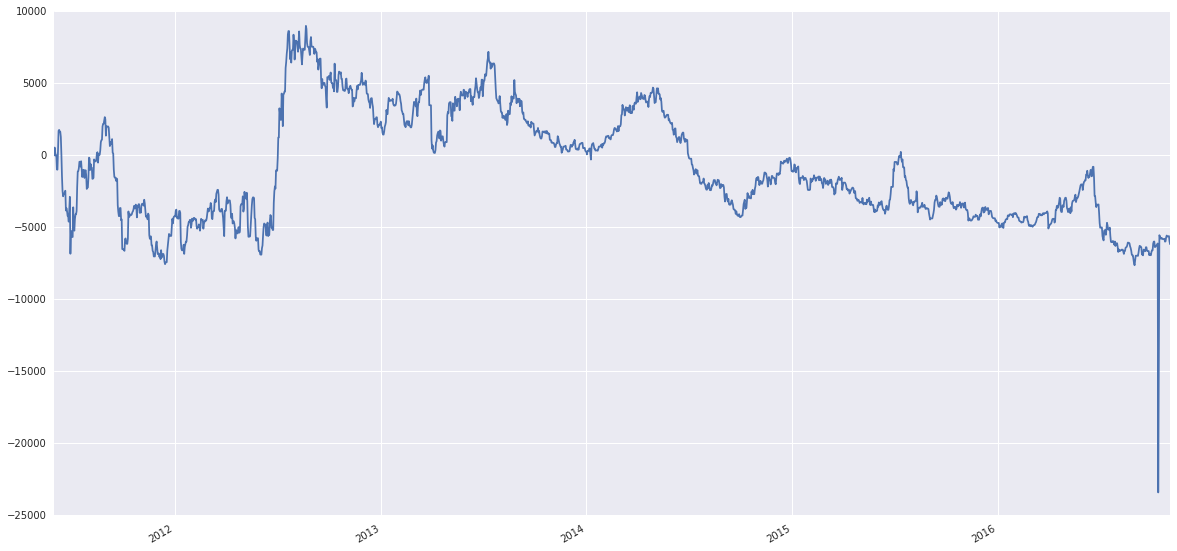

In [143]:
#px_ser = df.ZS_PutSpread.dropna()
px_ser = df.ZC_ContFut.dropna()
px_ser.dropna().plot()

# Data examination

In [144]:
exo_price = pd.Series(px_ser, name='exo')

data = pd.DataFrame(data=exo_price.dropna())

dataset_df = pd.DataFrame(data=exo_price)

'''dataset_df['target'] = dataset_df.exo.diff().shift(-1)
dataset_df['features_diff1'] = dataset_df.exo.diff()
dataset_df['features_diff10'] = dataset_df.exo.diff(10)
dataset_df['features_diff20'] = dataset_df.exo.diff(20)
dataset_df['features_diff50'] = dataset_df.exo.diff(50)
'''

dataset_df['target'] = dataset_df.exo.shift(-1)
#dataset_df['features_px'] = dataset_df.exo
dataset_df['features_shift1'] = dataset_df.exo.shift(1)
dataset_df['features_shift2'] = dataset_df.exo.shift(2)
dataset_df['features_shift3'] = dataset_df.exo.shift(3)
dataset_df['features_shift5'] = dataset_df.exo.shift(5)
dataset_df['features_shift10'] = dataset_df.exo.shift(10)

dataset_df['features_ma5'] = dataset_df.exo.rolling(5).mean()
dataset_df['features_ma10'] = dataset_df.exo.rolling(10).mean()
dataset_df['features_ma20'] = dataset_df.exo.rolling(20).mean()
dataset_df['features_ma30'] = dataset_df.exo.rolling(30).mean()

dataset_df['features_relstr5'] = dataset_df.exo - dataset_df.exo.rolling(5).mean()
dataset_df['features_relstr10'] = dataset_df.exo - dataset_df.exo.rolling(10).mean()
dataset_df['features_relstr20'] = dataset_df.exo - dataset_df.exo.rolling(20).mean()
dataset_df['features_relstra30'] = dataset_df.exo - dataset_df.exo.rolling(30).mean()

dataset_df.dropna(inplace=True)

#dataset_df = pd.DataFrame(data=preprocessing.StandardScaler().fit_transform(dataset_df.values), 
#                          index=dataset_df.index, columns=dataset_df.columns)

#dataset_df = pd.DataFrame(data=preprocessing.RobustScaler().fit_transform(dataset_df.values), 
#                          index=dataset_df.index, columns=dataset_df.columns)

target = dataset_df.target
features = dataset_df.filter(like='features')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3505199668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f348a3d1748>]], dtype=object)

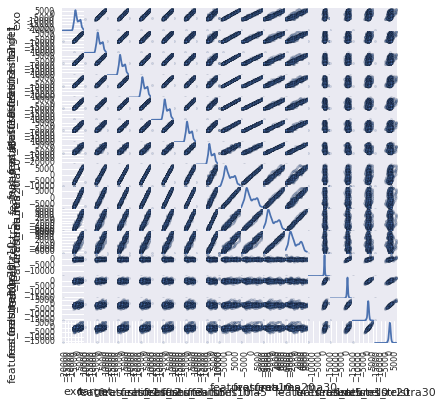

In [145]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(dataset_df, alpha=0.2, figsize=(6, 6), diagonal='kde')

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



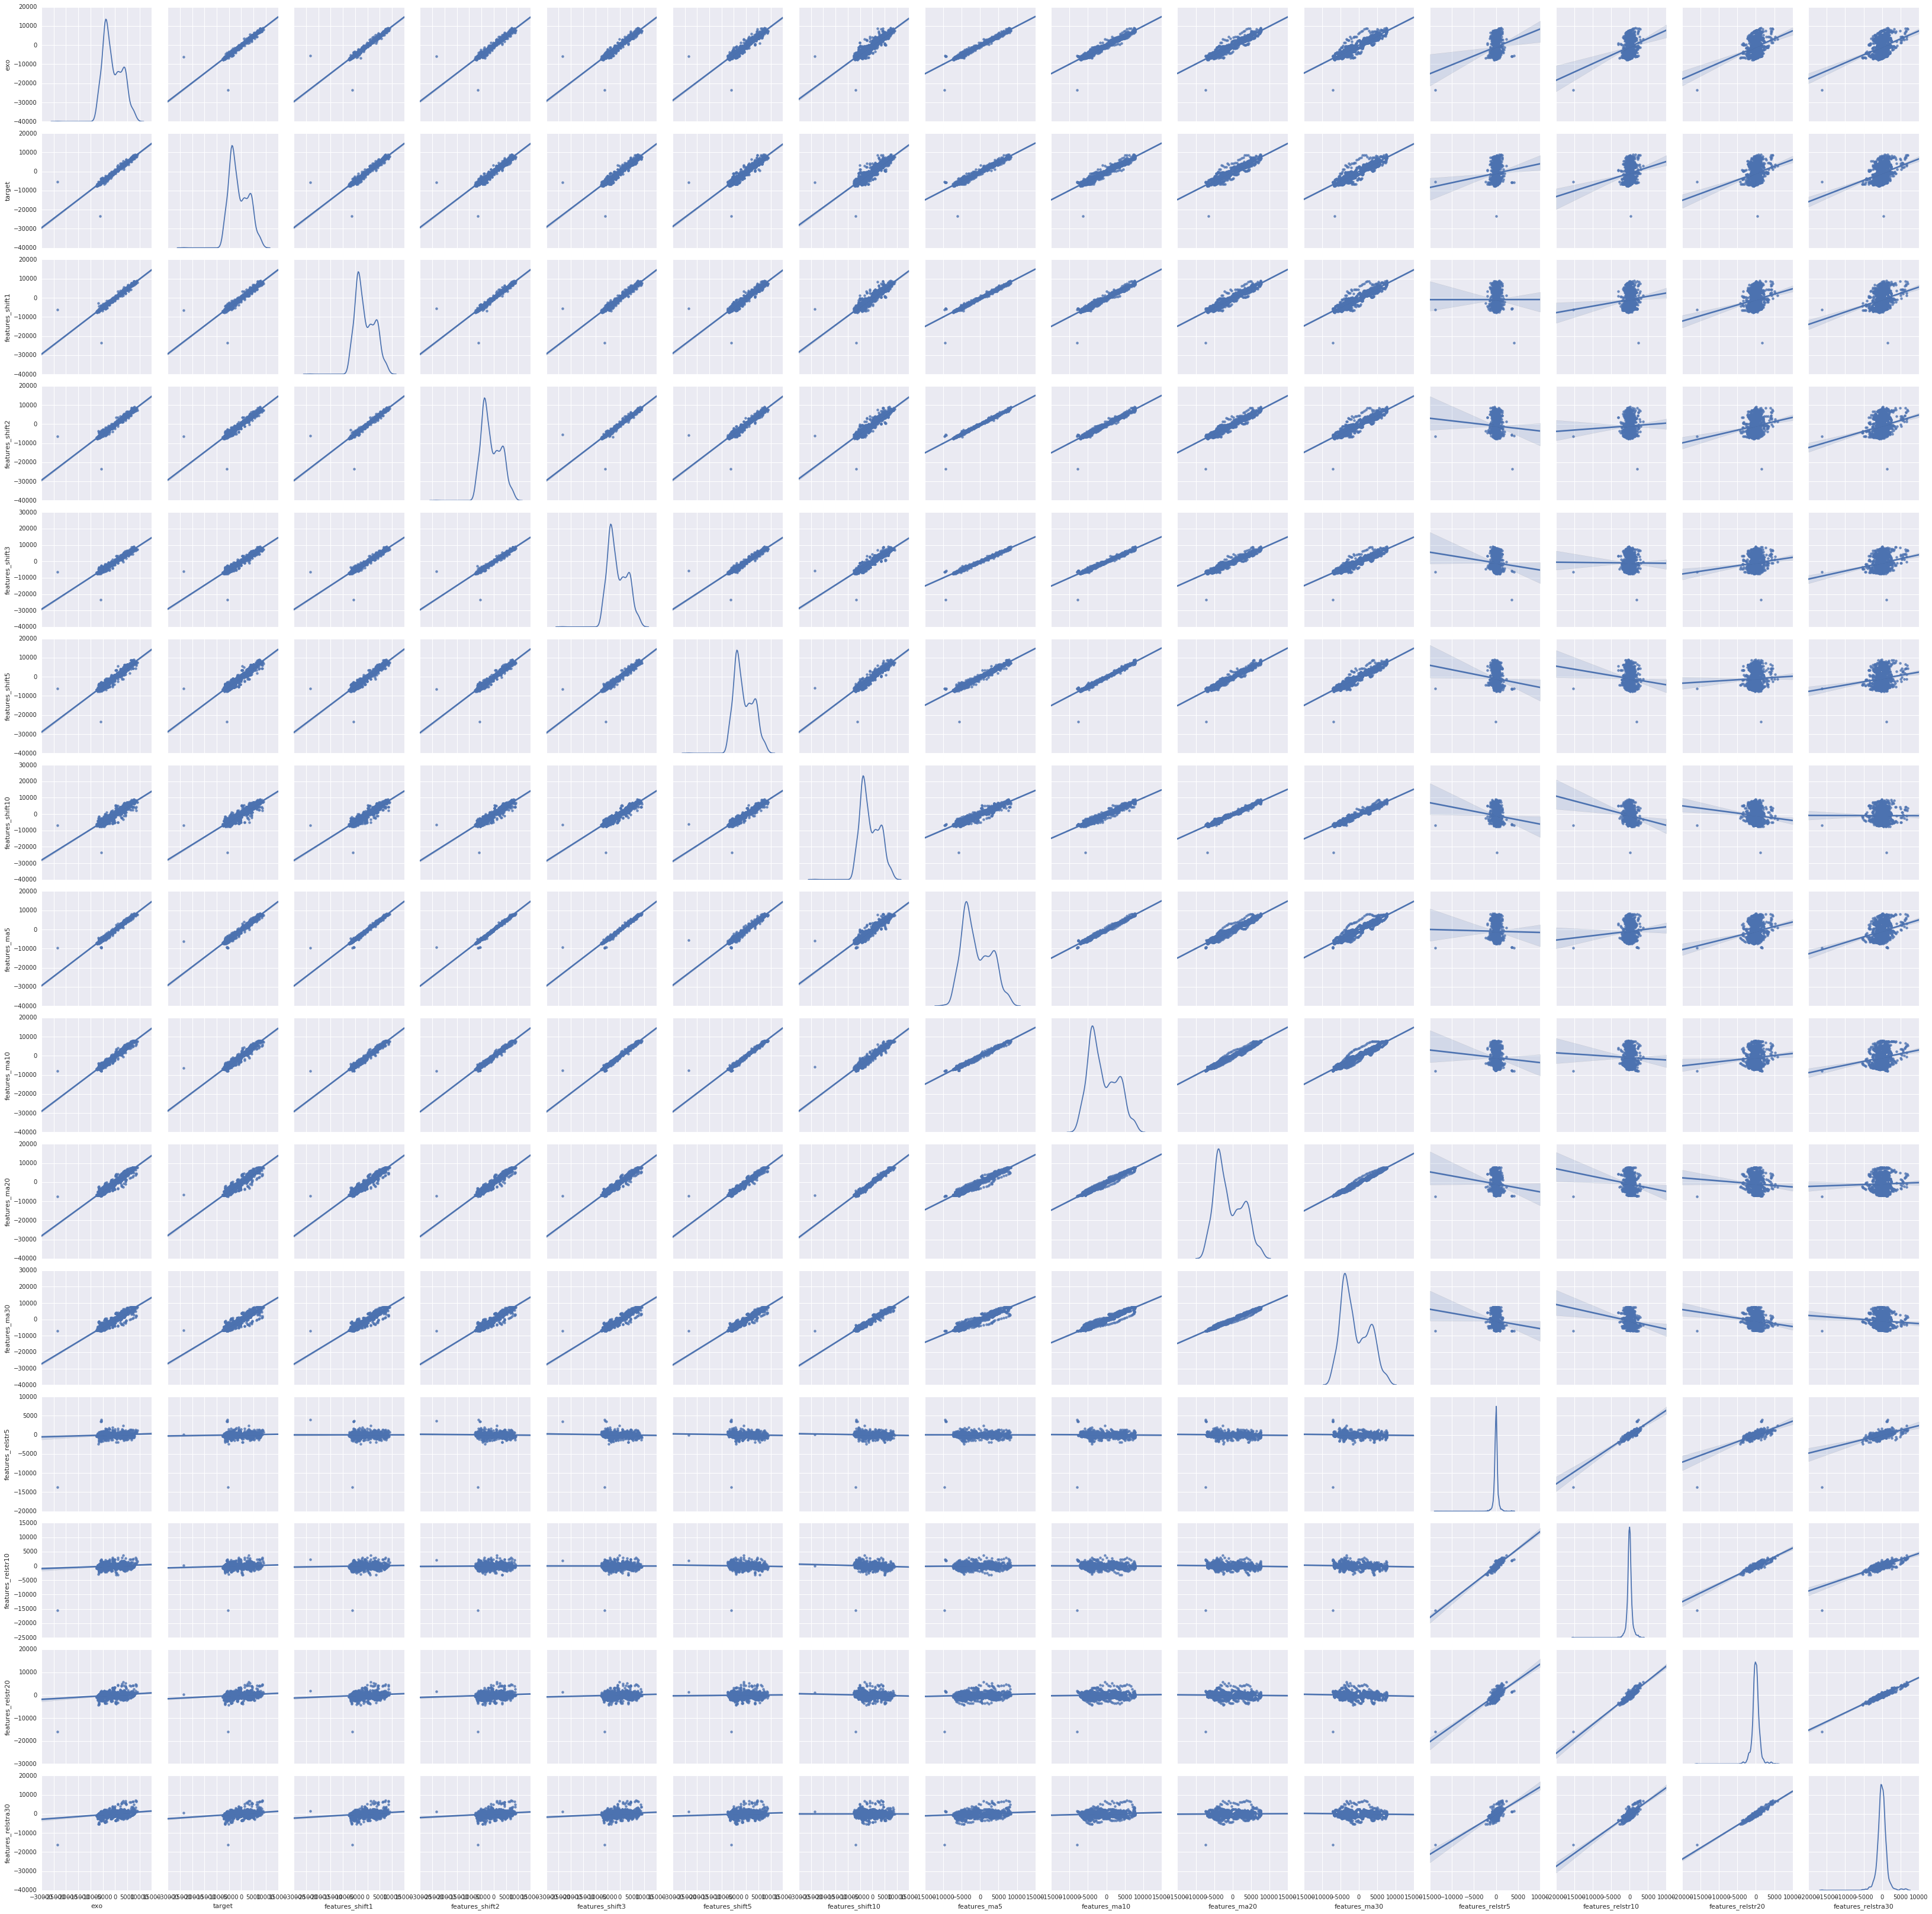

In [146]:
sns.pairplot(data=dataset_df, kind="reg", diag_kind="kde", size=3)

In [147]:
sm.tsa.adfuller(target)

(-2.1858087710820788,
 0.21143631172814986,
 3,
 1938,
 {'1%': -3.4337287320205792,
  '10%': -2.567564555950673,
  '5%': -2.8630325156796914},
 30065.059044046906)

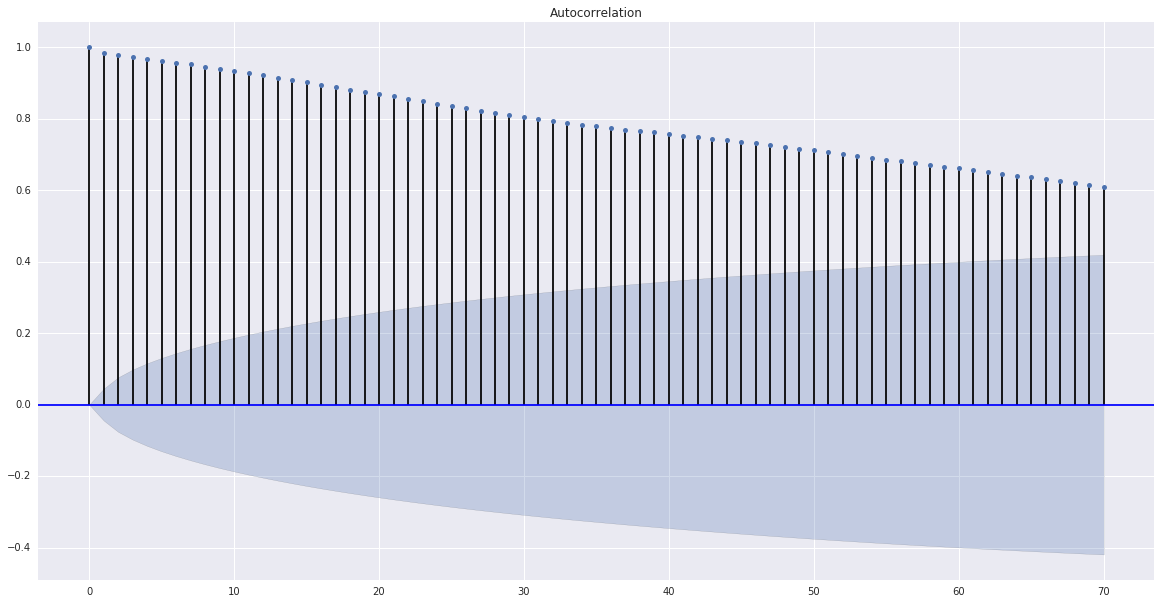

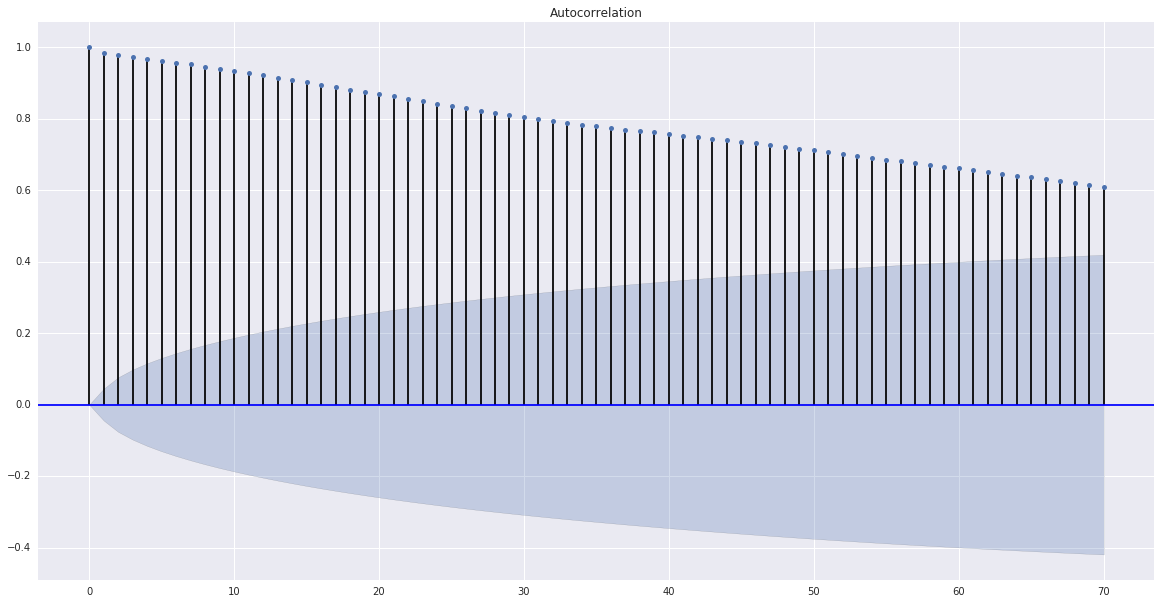

In [148]:
sm.graphics.tsa.plot_acf(target, lags=70)

# Model

In [149]:
#model = linear_model.LinearRegression()
#model = neighbors.KNeighborsRegressor(5)
#model = ensemble.AdaBoostRegressor(n_estimators=300, learning_rate=1)
model = ensemble.RandomForestRegressor()

model.fit(features, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [150]:
model.score(features, target)

0.99622623100969099

In [151]:
features = features[pd.Series(model.feature_importances_, index=features.columns).sort_values()[-3:].index]

In [152]:
features

,features_shift10,features_ma5,features_shift1
2011-06-30,-2537.5,-4432.5,-2875.0
2011-07-01,-2450.0,-4640.0,-6825.0
2011-07-02,-3825.0,-4852.5,-5237.5
2011-07-03,-3662.5,-5252.5,-5662.5
2011-07-04,-3862.5,-5810.0,-5662.5
2011-07-05,-4200.0,-5165.0,-5662.5
2011-07-06,-4200.0,-5135.0,-3600.0
2011-07-07,-4600.0,-5047.5,-5087.5
2011-07-08,-3662.5,-4800.0,-5225.0
2011-07-09,-2875.0,-4485.0,-4425.0


In [153]:
model.predict(features)

prediction_series = pd.Series(model.predict(features), name='Prediction', index=dataset_df.index)

ValueError: Number of features of the model must  match the input. Model n_features is 13 and  input n_features is 3 

In [ ]:
pd.concat([prediction_series, px_ser], axis=1).ix['2016'].plot()


# Streaming























In [ ]:
#py.sign_in('tmqr', '8rctfyu197')
py.sign_in('dmveden', 'rzbs7xw8ft')

tls.set_credentials_file(username='dmveden', api_key='rzbs7xw8ft')

In [ ]:
# Get stream id from stream id list 
stream_id1 = 'twfcm3v44s'
stream_id2 = '5dnfr3e5d8'
stream_id3 = '1ynb4ujpbt'
stream_id4 = '8k95n9xp75'

# Make instance of stream id object 
stream_1 = go.Stream(
    token=stream_id1,  # link stream id to 'token' key
    maxpoints=60      # keep a max of 80 pts on screen
)

# Make instance of stream id object 
stream_2 = go.Stream(
    token=stream_id2,  # link stream id to 'token' key
    maxpoints=60      # keep a max of 80 pts on screen
)

# Make instance of stream id object 
stream_3 = go.Stream(
    token=stream_id3,  # link stream id to 'token' key
    maxpoints=60      # keep a max of 80 pts on screen
)

# Make instance of stream id object 
stream_4 = go.Stream(
    token=stream_id4,  # link stream id to 'token' key
    maxpoints=60      # keep a max of 80 pts on screen
)



trace1 = go.Scatter(x=[], y=[], stream=stream_1, name='EXO Price')
trace2 = go.Scatter(x=[], y=[], stream=stream_2, name='Prediction Values', marker=dict(color='rgb(148, 103, 189)'))
trace3 = go.Scatter(x=[], y=[], stream=stream_3, name='Model Target', marker=dict(color='rgb(0, 255, 0'))
#trace4 = go.Scatter(x=[], y=[], stream=stream_4, name='Low Confidence Interval, 95%', marker=dict(color='rgb(255, 0, 0'))

#data = go.Data([trace1, trace2, trace3, trace4])
data = go.Data([trace1, trace2])
#data = go.Data([trace2, trace3])

# Add title to layout object
layout = go.Layout(title='Machine Learning Regression Prediction, retrain on every bar')

# Make a figure object
fig = go.Figure(data=data, layout=layout)

# Send fig to Plotly, initialize streaming plot, open new tab
py.iplot(fig, filename='python-streaming')

In [ ]:
# We will provide the stream link object the same token that's associated with the trace we wish to stream to
s_1 = py.Stream(stream_id=stream_id1)
s_2 = py.Stream(stream_id=stream_id2)
s_3 = py.Stream(stream_id=stream_id3)
#s_4 = py.Stream(stream_id=stream_id4)

# We then open a connection
s_1.open()
s_2.open()
s_3.open()
#s_4.open()

# (*) Import module keep track and format current time
import datetime 
import time   
 
i = 50  # a counter

only_new_predictions_flag = True

dataset_df = pd.DataFrame()
prediction_series = pd.Series()

while True:
    if i >= px_ser.dropna().size:
        break

    '''dataset_df['target'] = px_ser.diff().shift(-1)
    dataset_df['features_diff1'] = px_ser.diff()
    dataset_df['features_diff10'] = px_ser.diff(10)
    dataset_df['features_diff20'] = px_ser.diff(20)
    dataset_df['features_diff50'] = px_ser.diff(50)
    '''
    dataset_df = pd.DataFrame(index=px_ser.dropna().iloc[:i].index)
    
    px_ser_slice = px_ser[dataset_df.index].iloc[:i]
    
    dataset_df['target'] = px_ser_slice.shift(-10)
    
    #dataset_df['features_px'] = px_ser
    dataset_df['features_shift1'] = px_ser_slice.shift(1)
    dataset_df['features_shift2'] = px_ser_slice.shift(2)
    dataset_df['features_shift3'] = px_ser_slice.shift(3)
    dataset_df['features_shift5'] = px_ser_slice.shift(5)
    dataset_df['features_shift10'] = px_ser_slice.shift(10)

    dataset_df['features_ma5'] = px_ser_slice.rolling(5).mean()
    dataset_df['features_ma10'] = px_ser_slice.rolling(10).mean()
    dataset_df['features_ma20'] = px_ser_slice.rolling(20).mean()
    dataset_df['features_ma30'] = px_ser_slice.rolling(30).mean()

    dataset_df['features_relstr5'] = px_ser_slice - px_ser_slice.rolling(5).mean()
    dataset_df['features_relstr10'] = px_ser_slice - px_ser_slice.rolling(10).mean()
    dataset_df['features_relstr20'] = px_ser_slice - px_ser_slice.rolling(20).mean()
    dataset_df['features_relstra30'] = px_ser_slice - px_ser_slice.rolling(30).mean()
    
    predict_features = dataset_df.filter(like='features').dropna()
    
    dataset_df.dropna(inplace=True)

    #dataset_df = pd.DataFrame(data=preprocessing.StandardScaler().fit_transform(dataset_df.values), 
    #                          index=dataset_df.index, columns=dataset_df.columns)

    #dataset_df = pd.DataFrame(data=preprocessing.RobustScaler().fit_transform(dataset_df.values), 
    #                          index=dataset_df.index, columns=dataset_df.columns)

    target = dataset_df.target

    features = dataset_df.filter(like='features')
    
    #model = linear_model.LinearRegression()
    #model = linear_model.ElasticNet()
    #model = linear_model.RANSACRegressor()
    
    #knn = neighbors.KNeighborsRegressor(5)
    #lr = linear_model.LinearRegression()
    model = ensemble.BaggingRegressor(base_estimator=None, n_estimators=50)
    
    #model = linear_model.RANSACRegressor()
    #model = tree.DecisionTreeRegressor(max_depth=4)
    #model = svm.NuSVR()
    #model = ensemble.AdaBoostRegressor(n_estimators=10)
    #model = ensemble.GradientBoostingRegressor()
    #model = ensemble.RandomForestRegressor(n_estimators=50, max_depth=5, n_jobs=-1)
    #model = neighbors.KNeighborsRegressor(5, n_jobs=-1)
    
    model.fit(features.iloc[:i], target.iloc[:i])
        
    '''if i <= px_ser.size/4:
        model = neighbors.KNeighborsRegressor(5, n_jobs=-1)
        model.fit(features.iloc[:i], target.iloc[:i])
        print('NO FITTING FROM',  px_ser[dataset_df.index].iloc[:i].index[-1])'''
    
    '''if prediction_series.size == 0:    
        prediction_series = pd.Series(model.predict(predict_features.iloc[:i]), index=predict_features.iloc[:i].index, name='Prediction')
    
    else:
        prediction_series = pd.concat([prediction_series,
                                       pd.Series(model.predict(predict_features.iloc[:i])[-1], 
                                                 index=[predict_features.iloc[:i].index[-1] + pd.DateOffset(1)])])'''
    
        
    prediction_series = pd.Series(model.predict(features.iloc[:i]), 
                                  index=features.iloc[:i].index, name='Prediction')    
        
    if only_new_predictions_flag == True:
        x_1 = px_ser_slice.index
        y_1 = px_ser_slice

        x_2 = prediction_series.iloc[:i].index
        y_2 = prediction_series.iloc[:i]
   
        x_3 = target.iloc[:i].index
        y_3 = target.iloc[:i]
        
         
        s_2.write(dict(x=x_2, y=y_2))
        s_3.write(dict(x=x_3, y=y_3)) 
        
        #time.sleep(0.5)
        
        s_1.write(dict(x=x_1, y=y_1))  


        
    
    if only_new_predictions_flag == False:
        
        x_1 = target.iloc[:i].index
        y_1 = target.iloc[:i]

        x_2 = prediction_series.iloc[:i].index
        y_2 = prediction_series.iloc[:i] 

    
        x_3 = forecast_confint_df.High_ConfInterval_Boundary.iloc[:i].index
        y_3 = forecast_confint_df.High_ConfInterval_Boundary.iloc[:i] 
    
    #x_4 = forecast_confint_df.Low_ConfInterval_Boundary.iloc[:i].index
    #y_4 = forecast_confint_df.Low_ConfInterval_Boundary.iloc[:i] 
    
    # Send data to your plot
     
 
    #s_4.write(dict(x=x_4, y=y_4))  
 
    #     Write numbers to stream to append current data on plot,
    #     write lists to overwrite existing data on plot
    
       
    
    #x_1 = ts.iloc[:i+forecast_period].index
    #y_1 = ts.iloc[:i+forecast_period]
    #s_1.write(dict(x=x_1, y=y_1))  
    
        
    #time.sleep(0.1)  # plot a point every second    
    i += 1
    
   
# Close the stream when done plotting
s_1.close() 
s_2.close() 
s_3.close() 
#s_4.close() 

In [ ]:
px_ser[prediction_series.index].plot()
prediction_series.plot()
prediction_series.rolling(2).mean().plot()